In [27]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
popularity = pd.read_csv('popularity.csv')
popularity.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [6]:
popularity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
url                               39644 non-null object
 timedelta                        39644 non-null float64
 n_tokens_title                   39644 non-null float64
 n_tokens_content                 39644 non-null float64
 n_unique_tokens                  39644 non-null float64
 n_non_stop_words                 39644 non-null float64
 n_non_stop_unique_tokens         39644 non-null float64
 num_hrefs                        39644 non-null float64
 num_self_hrefs                   39644 non-null float64
 num_imgs                         39644 non-null float64
 num_videos                       39644 non-null float64
 average_token_length             39644 non-null float64
 num_keywords                     39644 non-null float64
 data_channel_is_lifestyle        39644 non-null float64
 data_channel_is_entertainment    39644 non-null float64
 data_channel_is_bus              396

In [16]:
popularity[' shares']

0          593
1          711
2         1500
3         1200
4          505
5          855
6          556
7          891
8         3600
9          710
10        2200
11        1900
12         823
13       10000
14         761
15        1600
16       13600
17        3100
18        5700
19       17100
20        2800
21         598
22         445
23        1500
24         852
25         783
26        1500
27        1800
28         462
29         425
         ...  
39614     1400
39615     5700
39616     2100
39617      691
39618     1400
39619     1200
39620     2400
39621    24300
39622     2900
39623      947
39624     3200
39625     1400
39626     1100
39627     1200
39628     1000
39629     2400
39630     1500
39631      914
39632     1700
39633     1500
39634     1000
39635     1300
39636     1700
39637     1400
39638     1200
39639     1800
39640     1900
39641     1900
39642     1100
39643     1300
Name:  shares, Length: 39644, dtype: int64

In [56]:
popularity[' shares'].describe(percentiles=[.05,.1,.2,.3,.4,.5,.6,.7,.8,.9,.95])

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
5%          584.000000
10%         708.000000
20%         870.600000
30%        1000.000000
40%        1200.000000
50%        1400.000000
60%        1800.000000
70%        2300.000000
80%        3400.000000
90%        6200.000000
95%       10800.000000
max      843300.000000
Name:  shares, dtype: float64

In [46]:
popularity[' shares'].describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

In [50]:
len(popularity.loc[popularity[' shares'] > 3400, ' shares'])

7808

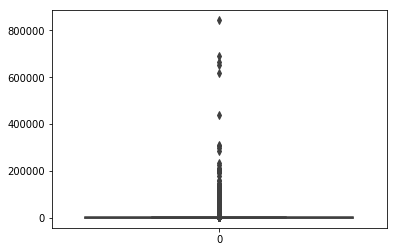

In [15]:
sns.boxplot(data=popularity[' shares'])

In [54]:
arr = np.array(popularity[' shares'])


#Q1 = popularity[' shares'].quantile(.1)
Q3 = popularity[' shares'].quantile(.95)

arr = [x for x in arr if (x < Q3)]
print('< ', len(arr))

<  37644


In [55]:
df = pd.DataFrame(arr)
df.describe(percentiles=[.1,.2,.3,.4,.5,.6,.7,.8,.9,.95])

,0
count,37644.000000
mean,2069.930294
std,1861.990219
min,1.000000
10%,699.000000
20%,855.000000
30%,1000.000000
40%,1200.000000
50%,1400.000000
60%,1700.000000
